# Exploratory Data Analysis for Housing Dataset

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Load the dataset

In [2]:
file_path = "C:\\Users\\ramana777\\Downloads\\housing.csv"
data = pd.read_csv(file_path)

### Data Overview

In [3]:
print("Housing Data:\n")
data

Housing Data:



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
print("\nDataset Overview:")
data.info()


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
print("\nFirst Five Rows:")
data.head()


First Five Rows:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
print("\nBasic Statistics:")
data.describe()


Basic Statistics:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Missing Values Analysis

In [7]:
print("\nMissing Values:")
data.isnull().sum()


Missing Values:


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Visualize missing Values

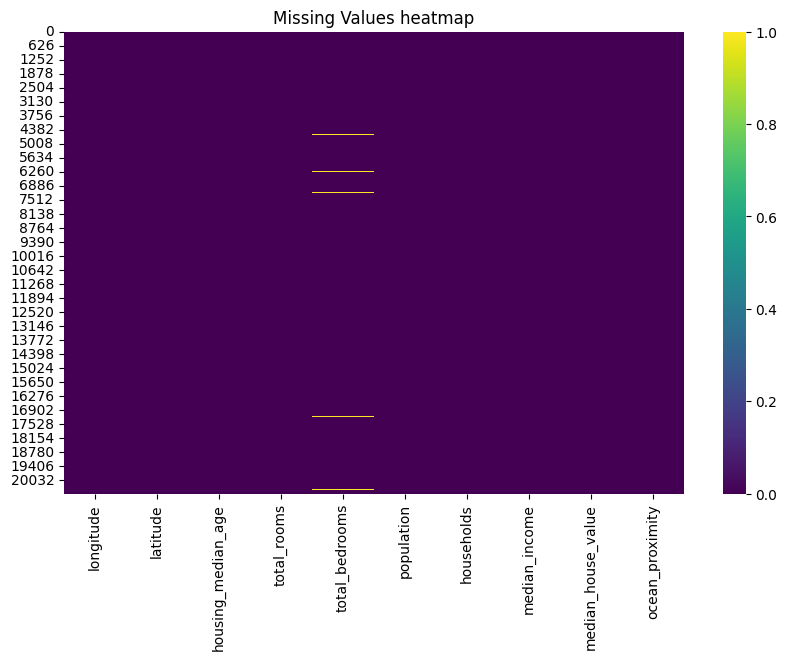

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),cbar=True,cmap="viridis")
plt.title("Missing Values heatmap")
plt.show()

### Fill missing Values

In [9]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())

### Univariate Analysis

In [10]:
categorical_cols = ['ocean_proximity']
numerical_cols = [col for col in data.columns if col not in categorical_cols]

### Numerical columns Analysis

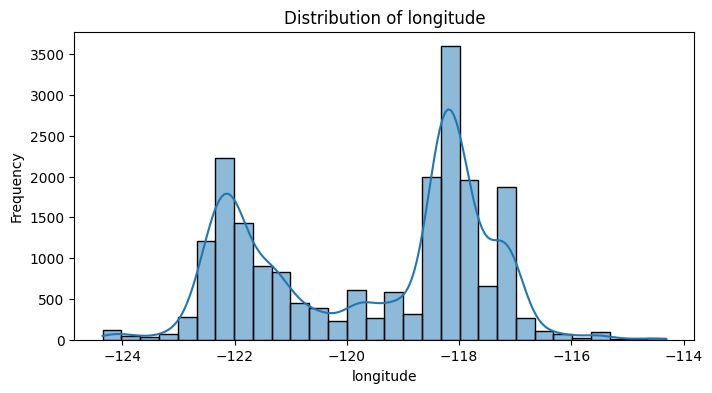

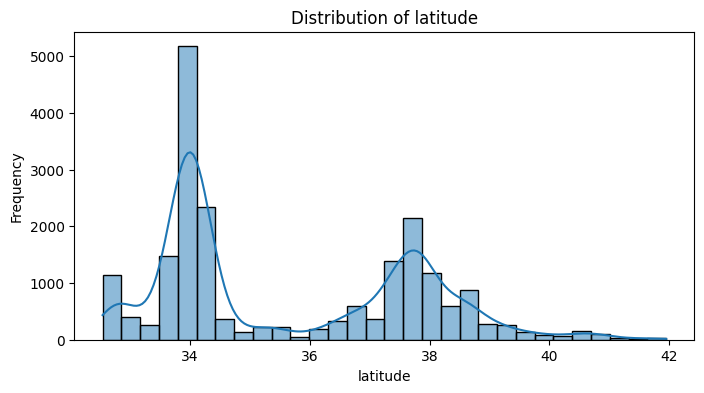

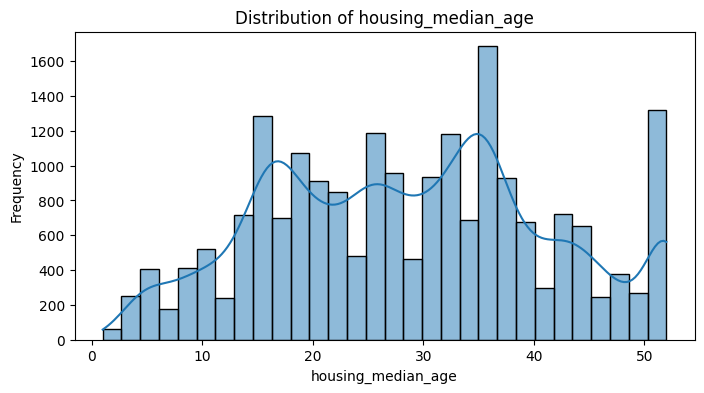

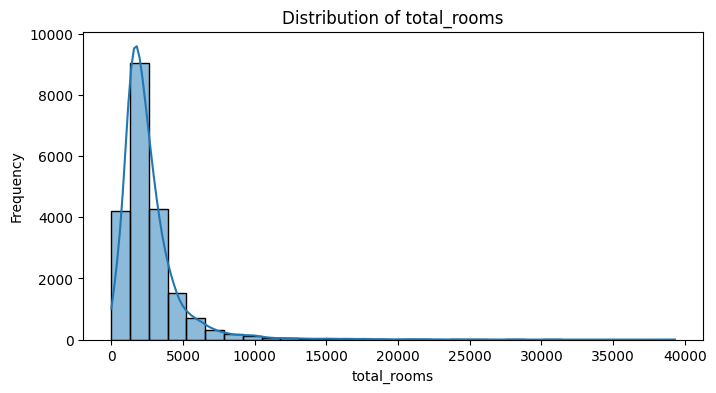

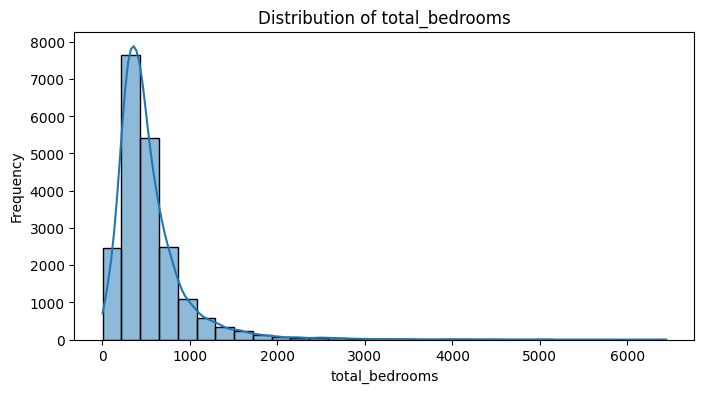

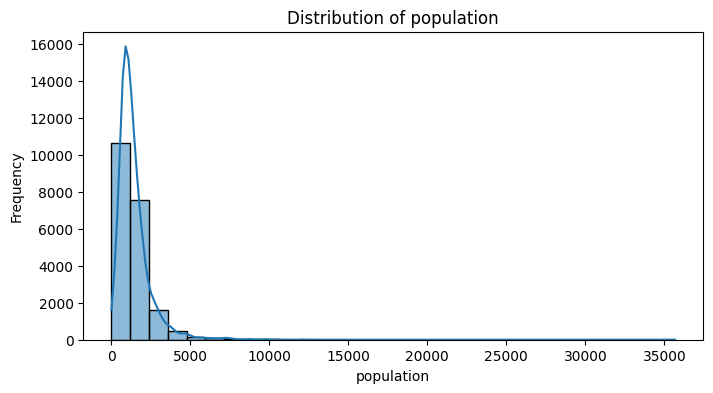

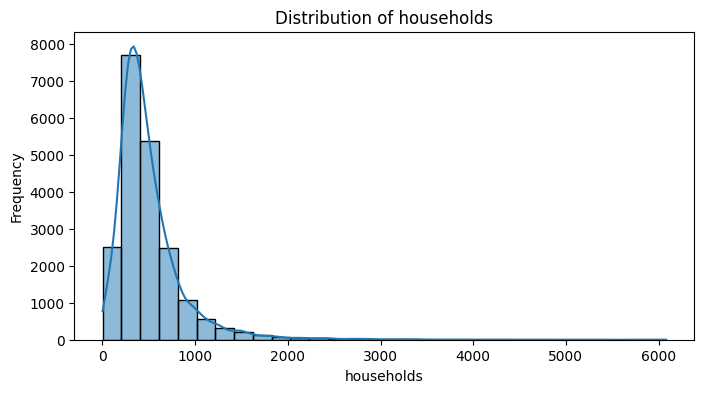

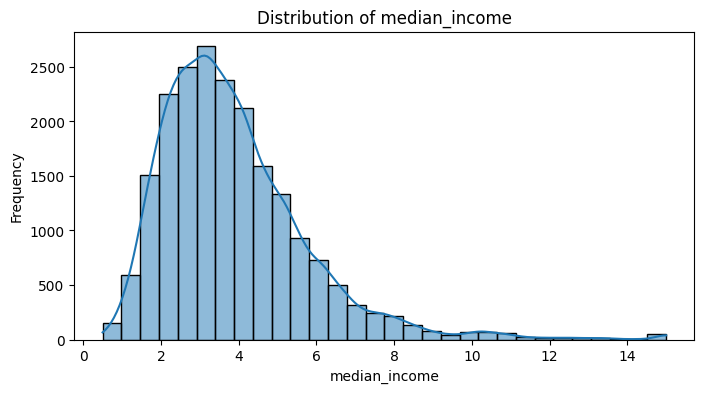

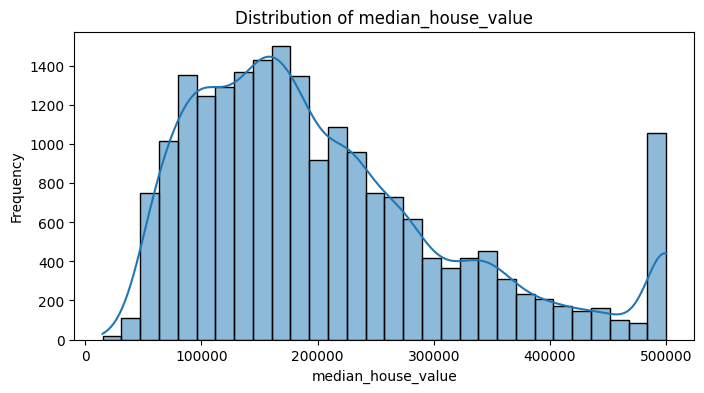

In [11]:
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(data[col],kde=True,bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

### Categorical column countplot

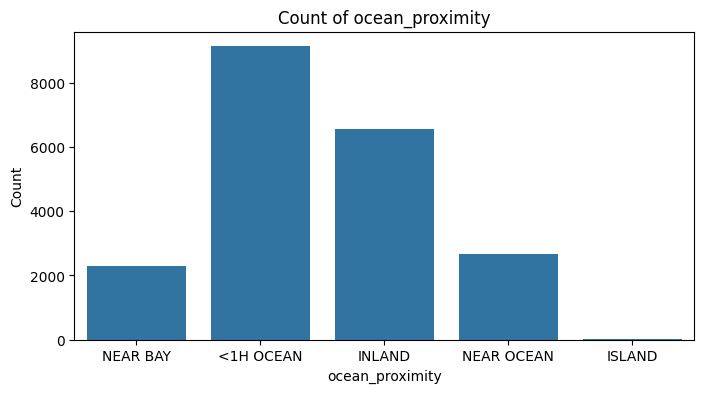

In [12]:
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=data[col])
    plt.title(f"Count of {col}")
    plt.ylabel("Count")
    plt.show()

### Bivariate Analysis

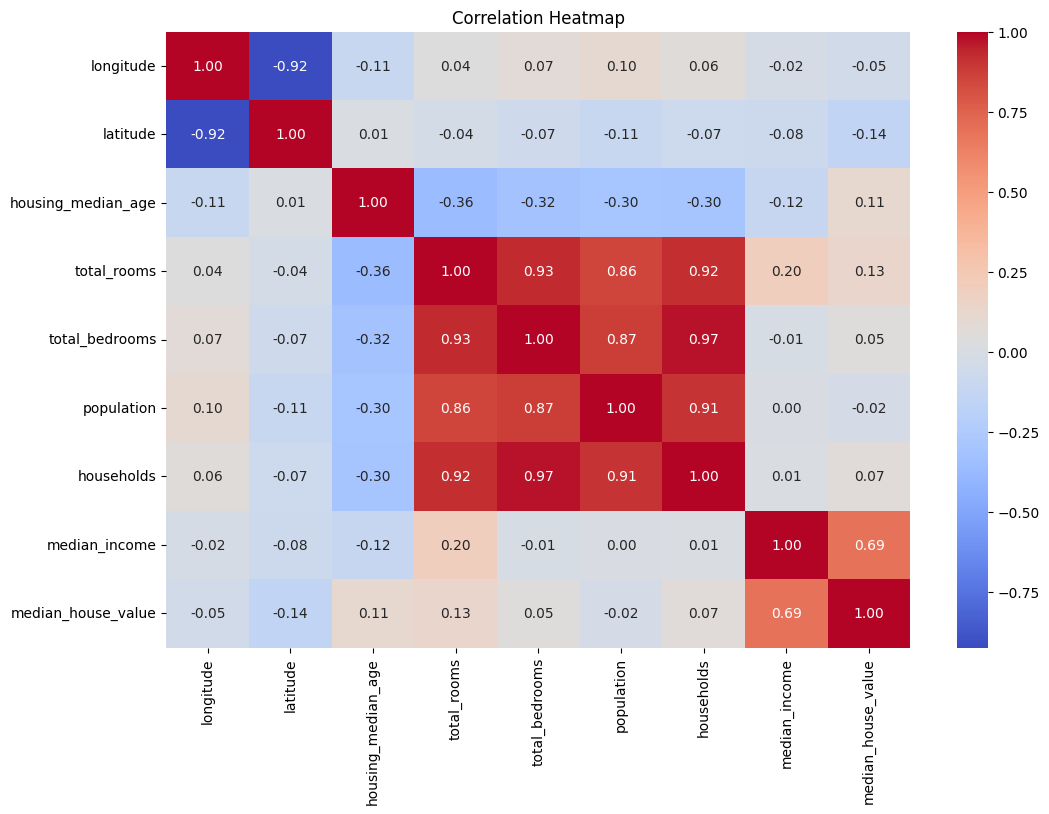

In [13]:
data_numeric = data.drop(columns=categorical_cols)
corr_matrix = data_numeric.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Relationship between median_house_value and median_income

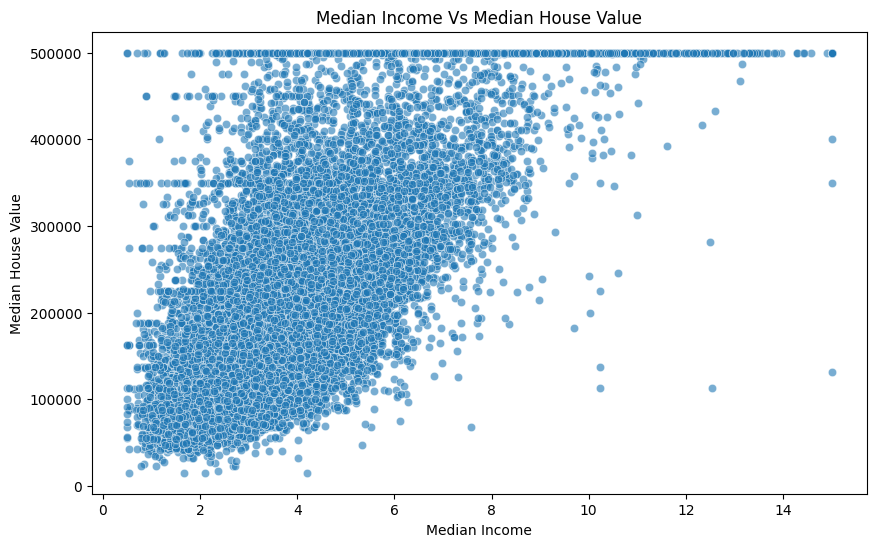

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='median_income',y='median_house_value',data=data,alpha=0.6)
plt.title("Median Income Vs Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()

### Distribution of housing_median_age

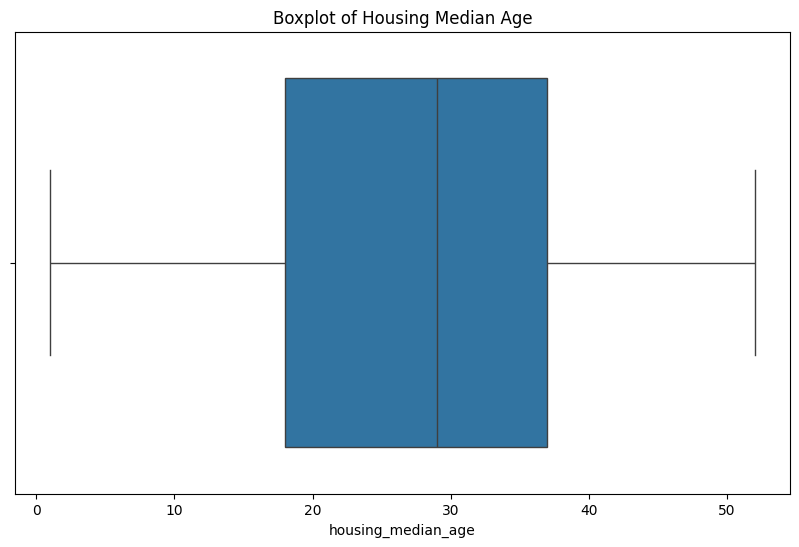

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['housing_median_age'])
plt.title("Boxplot of Housing Median Age")
plt.show()

### Total rooms vs. total bedrooms scatterplot

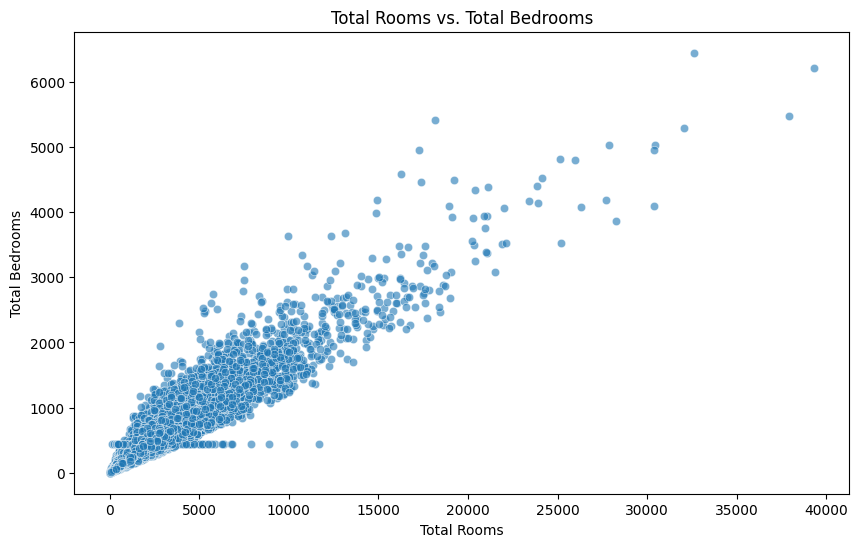

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_rooms', y='total_bedrooms', data=data, alpha=0.6)
plt.title("Total Rooms vs. Total Bedrooms")
plt.xlabel("Total Rooms")
plt.ylabel("Total Bedrooms")
plt.show()

### Feature Engineering

In [17]:
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']

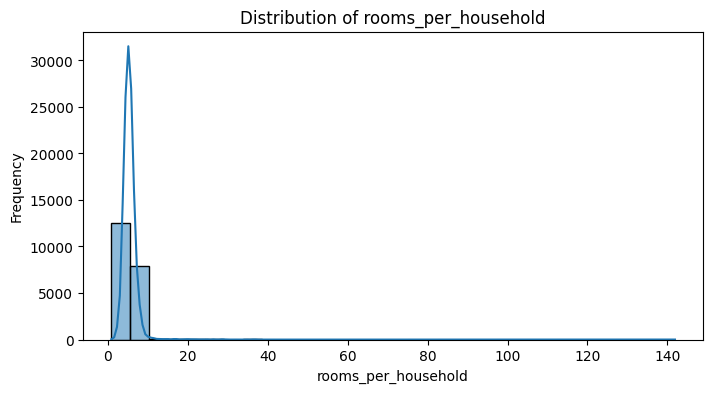

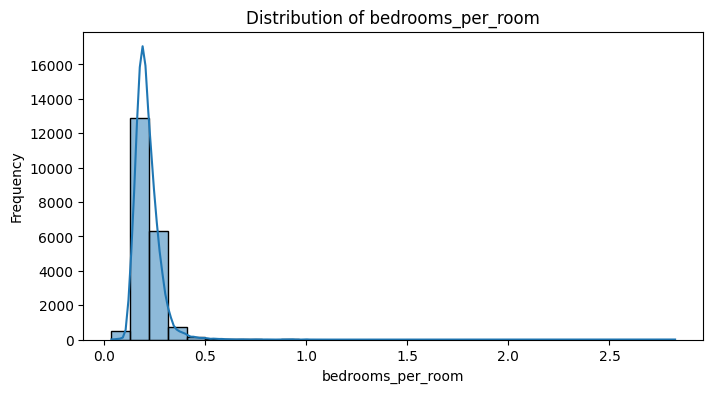

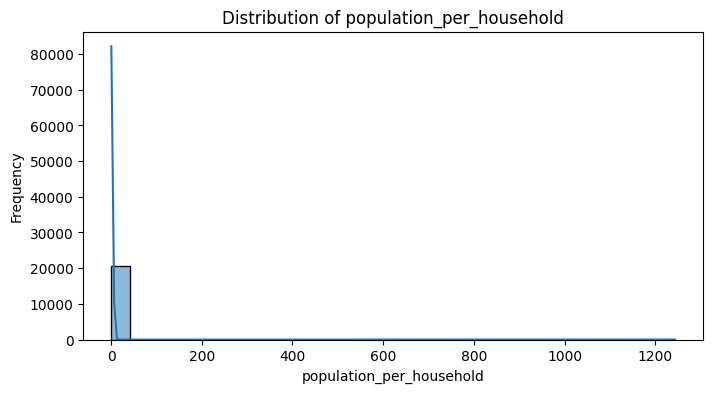

In [18]:
# Visualize new features
for col in ['rooms_per_household', 'bedrooms_per_room', 'population_per_household']:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

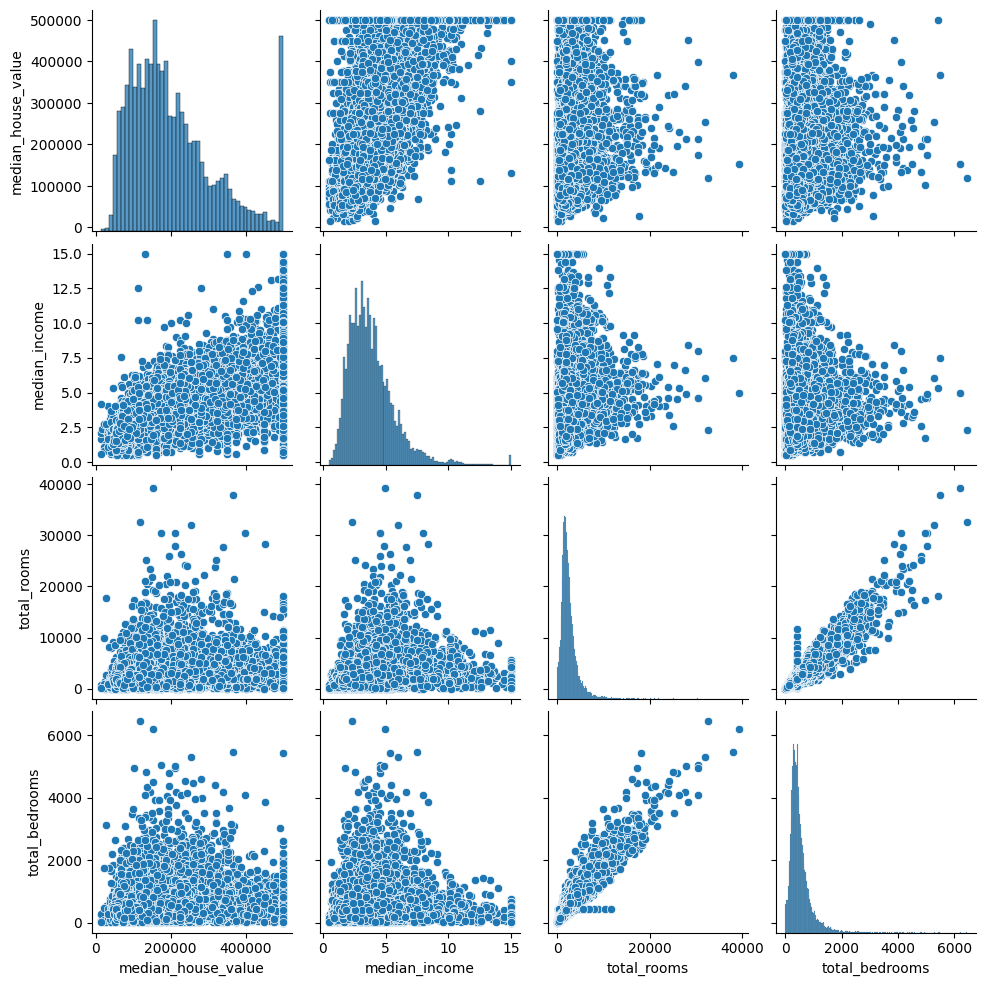

In [19]:
sns.pairplot(data[['median_house_value', 'median_income', 'total_rooms', 'total_bedrooms']])
plt.show()

### Categorical Encoding

In [20]:
encoded_data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

### Advanced Visualization

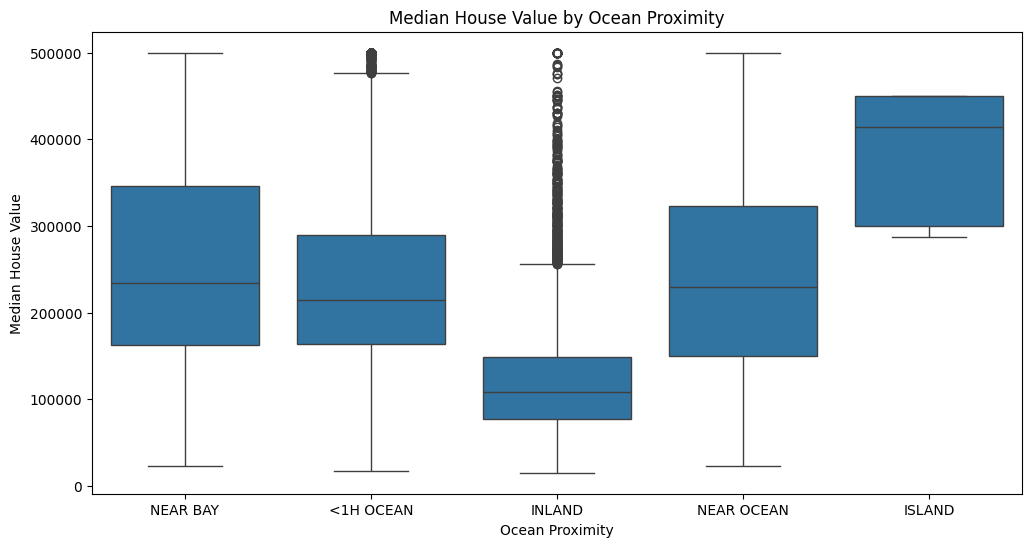

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data)
plt.title("Median House Value by Ocean Proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value")
plt.show()

C:\Users\ramana777\AppData\Local\Temp\ipykernel_22932\2627986918.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='housing_median_age', y='median_house_value', data=data, ci=None)


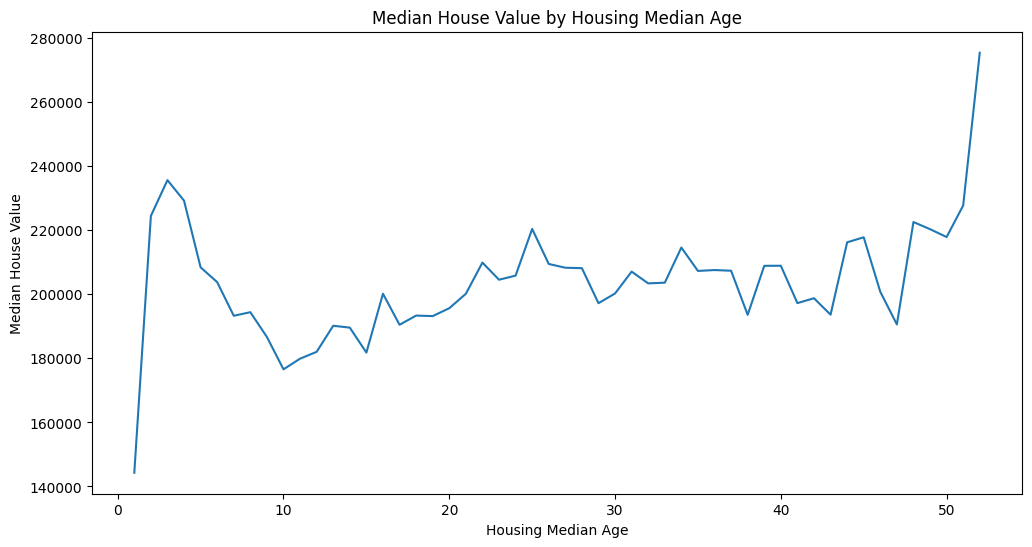

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='housing_median_age', y='median_house_value', data=data, ci=None)
plt.title("Median House Value by Housing Median Age")
plt.xlabel("Housing Median Age")
plt.ylabel("Median House Value")
plt.show()

### Principal Component Analysis

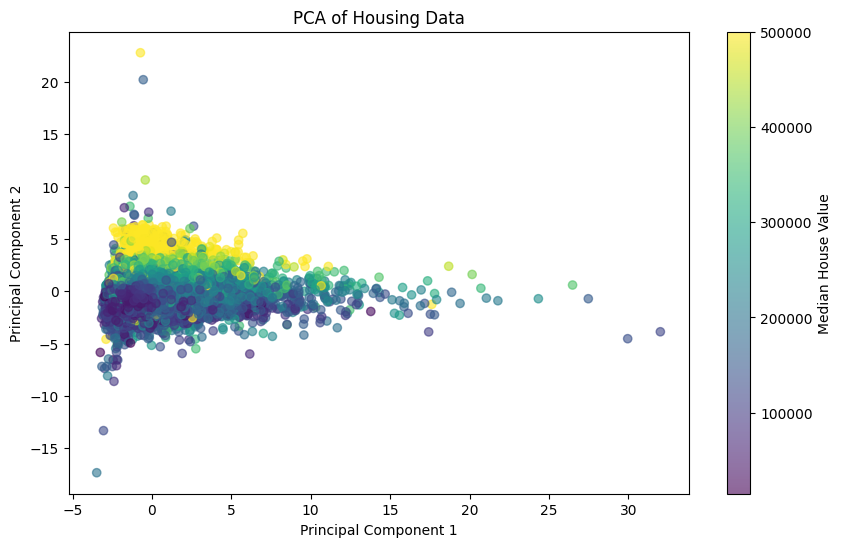

In [23]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(encoded_data.select_dtypes(include=np.number))
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6, c=data['median_house_value'], cmap='viridis')
plt.colorbar(label='Median House Value')
plt.title("PCA of Housing Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### Clustering with KMeans

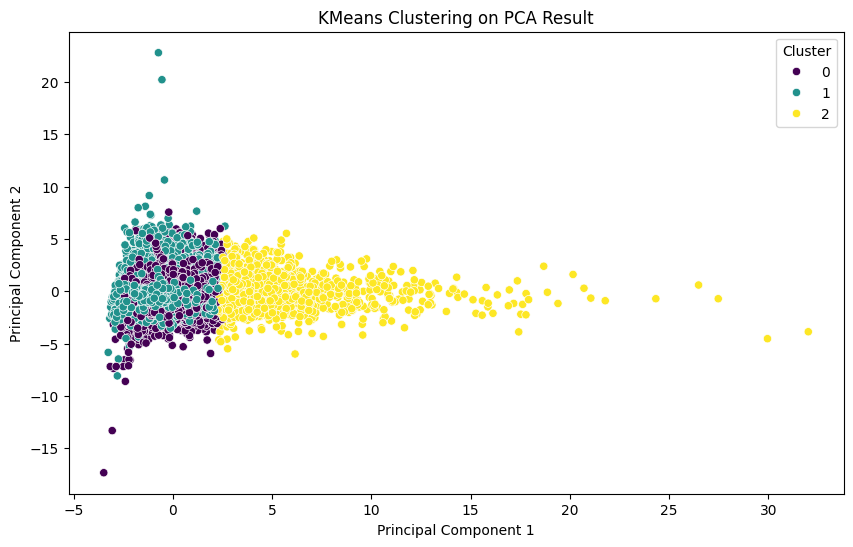

In [24]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=data['Cluster'], palette='viridis')
plt.title("KMeans Clustering on PCA Result")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

### Save clean and transformed Data

In [25]:
encoded_data['Cluster'] = data['Cluster']
file_path = r"C:\\Users\\ramana777\\Downloads\\enhanced_housing_data.csv"
encoded_data.to_csv(file_path, index=False)

print(f"File saved at: {file_path}")

File saved at: C:\\Users\\ramana777\\Downloads\\enhanced_housing_data.csv


### Reading the clean and transformed data 

In [26]:
file_path = "C:\\Users\\ramana777\\Downloads\\enhanced_housing_data.csv"
data = pd.read_csv(file_path)

### Data overview of clean and transformed data

In [27]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,Cluster
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,False,False,True,False,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,False,False,True,False,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,False,False,True,False,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,False,False,True,False,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,0.224625,2.560606,True,False,False,False,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,0.215208,3.122807,True,False,False,False,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,0.215173,2.325635,True,False,False,False,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,0.219892,2.123209,True,False,False,False,1


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   rooms_per_household         20640 non-null  float64
 10  bedrooms_per_room           20640 non-null  float64
 11  population_per_household    20640 non-null  float64
 12  ocean_proximity_INLAND      20640 non-null  bool   
 13  ocean_proximity_ISLAND      206

In [29]:
data.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,Cluster
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,Cluster
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213794,3.070655,0.563421
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.065248,10.386050,0.641031
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.037151,0.692308,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175225,2.429741,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203159,2.818116,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.240126,3.282261,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,2.824675,1243.333333,2.000000
